In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow as tf
print("Device:", tf.test.gpu_device_name())


Device: /device:GPU:0


In [3]:
# Setting the path to our data
train_data_dir = './Ultrasonic_weld_v1/train/'
validation_data_dir = './Ultrasonic_weld_v1/valid/'
test_data_dir = "./Ultrasonic_weld_v1/test/"

In [4]:
# Setting the image and batch size
img_width, img_height = 224, 224
batch_size = 10

In [5]:

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Only rescaling for validation set
val_datagen = ImageDataGenerator(rescale=1./255)

# Only rescaling for testing set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and validation datasets
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_data_dir,
                                                      target_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                      target_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      class_mode='categorical')



Found 420 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


Found 80 images belonging to 4 classes.


In [6]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
conv1_output = model.layers[-1].output
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# model fitting
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=validation_generator)

Epoch 1/10
42/42 [==============================] - 41s 733ms/step - loss: 1.3913 - accuracy: 0.2571 - val_loss: 1.3655 - val_accuracy: 0.4200
Epoch 2/10
42/42 [==============================] - 30s 720ms/step - loss: 0.9623 - accuracy: 0.6167 - val_loss: 0.6096 - val_accuracy: 0.8700
Epoch 3/10
42/42 [==============================] - 30s 713ms/step - loss: 0.6072 - accuracy: 0.8024 - val_loss: 0.4248 - val_accuracy: 0.9100
Epoch 4/10
42/42 [==============================] - 29s 704ms/step - loss: 0.3758 - accuracy: 0.8714 - val_loss: 0.2985 - val_accuracy: 0.9100
Epoch 5/10
42/42 [==============================] - 30s 701ms/step - loss: 0.4006 - accuracy: 0.8714 - val_loss: 0.4927 - val_accuracy: 0.7900
Epoch 6/10
42/42 [==============================] - 29s 696ms/step - loss: 0.2734 - accuracy: 0.9048 - val_loss: 0.1202 - val_accuracy: 0.9800
Epoch 7/10
42/42 [==============================] - 29s 699ms/step - loss: 0.2104 - accuracy: 0.9381 - val_loss: 0.1037 - val_accuracy: 0.9400

In [9]:
# Evaluate the model on the testing set
test_loss, test_acc  = model.evaluate(test_generator)
print(f'Test_accuracy:{test_acc}')
print(f'Test_loss:{test_loss}')

# Make predictions on the test set / predections gives us the categoury/ class for which our data/ image belongs to/ givest he classification probabilitiees
predictions = model.predict(test_generator)

8/8 [==============================] - 4s 529ms/step - loss: 0.0745 - accuracy: 0.9750
Test_accuracy:0.9750000238418579
Test_loss:0.07446005195379257
8/8 [==============================] - 4s 495ms/step


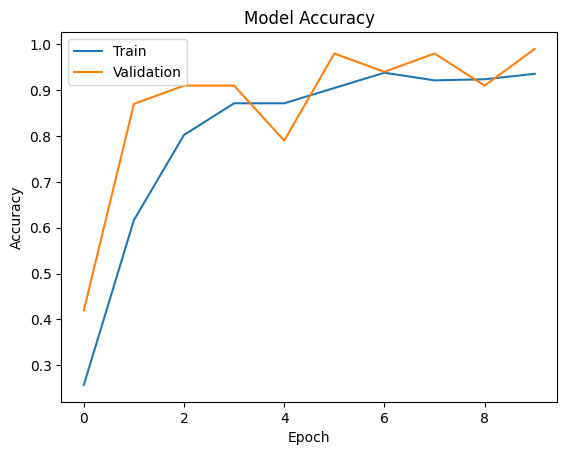

In [10]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
#saving model
from keras.models import load_model

# Save the model
model.save('Ultrasonic_welding_IPDL.h5')

# # Load the model
model1 = load_model('./Ultrasonic_welding_IPDL.h5')


In [12]:
#predection on random images
from PIL import Image
import os

# Define the classes
classes = ['dent', 'good', 'overextrusion', 'scratch']

# Set the path to the image dataset
image_path = './test_predect/'

# Loop through the images in the dataset
for file in os.listdir(image_path):
    # Load the image
    img = Image.open(os.path.join(image_path, file)).resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Make a prediction
    prediction = model1.predict(img)

    
    # Get the label of the predicted class
    label = classes[np.argmax(prediction)]
    
    # Print the prediction along with the label
    print(f"Prediction: {prediction}, Label: {label}")

1/1 [==============================] - 0s 321ms/step
Prediction: [[0.6327786  0.0170063  0.05304866 0.29716638]], Label: dent
1/1 [==============================] - 0s 21ms/step
Prediction: [[9.9742836e-01 2.0858967e-03 1.5649978e-04 3.2919669e-04]], Label: dent
1/1 [==============================] - 0s 29ms/step
Prediction: [[1.3327420e-04 9.9852622e-01 9.2158531e-05 1.2483011e-03]], Label: good
1/1 [==============================] - 0s 24ms/step
Prediction: [[2.7190964e-04 9.9860901e-01 5.7870275e-05 1.0612638e-03]], Label: good
1/1 [==============================] - 0s 23ms/step
Prediction: [[3.9680390e-06 3.7279711e-04 9.9790996e-01 1.7132501e-03]], Label: overextrusion
1/1 [==============================] - 0s 22ms/step
Prediction: [[5.3344262e-05 1.9621844e-03 9.9072683e-01 7.2576292e-03]], Label: overextrusion
1/1 [==============================] - 0s 20ms/step
Prediction: [[0.11517905 0.11846752 0.08886411 0.6774893 ]], Label: scratch
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 25ms/step
Dent_1.jpg - Prediction: dent, True Label: dent
1/1 [==============================] - 0s 24ms/step
Dent_3.jpg - Prediction: dent, True Label: dent
1/1 [==============================] - 0s 21ms/step
GOOD_2.jpg - Prediction: good, True Label: good
1/1 [==============================] - 0s 21ms/step
GOOD_3.jpg - Prediction: good, True Label: good
1/1 [==============================] - 0s 20ms/step
overextrusion_1.jpg - Prediction: overextrusion, True Label: overextrusion
1/1 [==============================] - 0s 27ms/step
overextrusion_3.jpg - Prediction: overextrusion, True Label: overextrusion
1/1 [==============================] - 0s 26ms/step
scratch_1.jpg - Prediction: scratch, True Label: scratch
1/1 [==============================] - 0s 21ms/step
scratch_3.jpg - Prediction: good, True Label: scratch


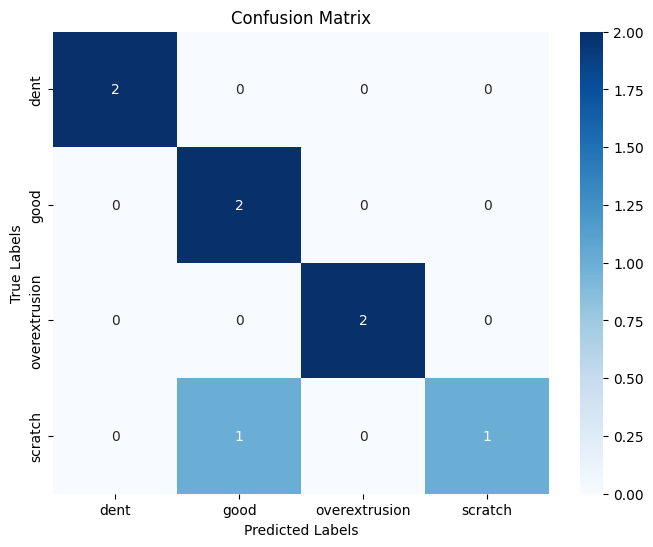

In [13]:
import os
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classes
classes = ['dent', 'good', 'overextrusion', 'scratch']

# Set the path to the image dataset
image_path = './test_predect/'

# Initialize an empty list to store predictions and true labels
all_predictions = []
all_true_labels = []

# Loop through the images in the dataset
for file in os.listdir(image_path):
    # Load the image
    img = Image.open(os.path.join(image_path, file)).resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Make a prediction
    prediction = model1.predict(img)
    
    # Get the label of the predicted class
    predicted_label = classes[np.argmax(prediction)]
    
    # Extract the true label from the filename (modify the parsing if needed)
    true_label = file.split('_')[0].lower()  # Assuming the filename contains the true label before an underscore
    
    # Check if the true label is valid (exists in classes)
    if true_label not in classes:
        print(f"Warning: Invalid true label '{true_label}' for file '{file}'. Skipping this sample.")
    else:
        # Add predictions and true labels to the lists
        all_predictions.append(predicted_label)
        all_true_labels.append(true_label)

        # Print the prediction along with the label
        print(f"{file} - Prediction: {predicted_label}, True Label: {true_label}")

# Create the confusion matrix if there are valid samples
if len(all_predictions) > 0:
    # Create the confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predictions, labels=classes)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("No valid samples found. Check the true labels and filenames.")
